This assignment serves three purposes:

--> Introducing you to RandomForestClassifier
--> Trying to implement Dense CNN model using the skills you gained till now

This assingemnt might not contain a line to line explaination of the task to be performed. You got to start visiting the documentations or any example online to help you out with queries like syntax and parameters.

The third and the most crucial purpose of all is helping you understand how to implement different models for the same task.
Here, we have given you the task of hand-written digit classification on MNIST dataset, first using RandomForestClassifier and second using Dense CNN and if you wish, you could also try to implement this task from the model of previous assingment with of-course a little bit of tweaking. 

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [0]:
from scipy.io import loadmat
# set path of dataset to mnist_path varaible and loadmat() it to mnist_raw
mnist_path = '/content/mnist-original.mat' #path to the dataset (in .mat format)
mnist_raw = loadmat(mnist_path)
mnist ={ "data":mnist_raw["data"].T,"target":mnist_raw["label"][0],
         "COL_NAMES":["label","data"],"DESCR": "mldata.org dataset:mnist-original",
       }

In [0]:
# store data in X and target in y
X = mnist['data']
y = mnist['target']

#Our data is expected to has 70000 instances(rows) and 784 features(columns)

print("Shape of X:"+str(X.shape))
print("Shape of Y:"+str(y.shape))

Shape of X:(70000, 784)
Shape of Y:(70000,)


In [0]:
# To randomize out data set we have to shuffle it
#np.random.permutation() gives us an np.array of numbers in range given range
#  reshuffle X and y
X = np.random.permutation(X)
y = np.random.permutation(y)

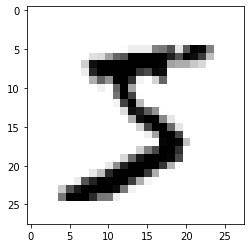

In [0]:
# import matplotlib 
import matplotlib.pyplot as plt
# pick any example from z, rehshape it to 28x28 type and display it using matplot
img = X[0].reshape([28,28])
plt.imshow(img, cmap = 'gray_r')
plt.show()

In [0]:
# we are dividing the data in 60,000 and 10,000 for training and testing
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [0]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

#create a rondom forest classifier with random state of 42 and fit your train varaibles 

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

In [0]:
# predict your train X varariable and find mean_absolute error it should be around 0.00333
# repeat the same for test X it should be around 0.205

In [0]:
rf_val_mae = mean_absolute_error(rf_model.predict(X_train), y_train)
print("Validation MAE for Random Forest Model (Train set): {}".format(rf_val_mae))

Validation MAE for Random Forest Model (Train set): 0.0


In [0]:
rf_val_mae = mean_absolute_error(rf_model.predict(X_test), y_test)
print("Validation MAE for Random Forest Model (Test set): {}".format(rf_val_mae))

Validation MAE for Random Forest Model (Test set): 3.3838


In [0]:
# Now that RandonForest has been explored, we'll be implementing Dense CNN model

In [0]:
#mnist = tf.keras.datasets.mnist
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# First order of business is creating the model
# for that purpose we've already imported the required things 
# your task is to use the above imported modules and whatever skills you have harnessed and build a model from scratch
# JUST A REMINDER , WE TRIED TO INTRODUCE YOU ALL WITH MOST OF THE LIBRARIES WHICH WE USE ON A DAILY BASIS
# ONE OF THEM IS KERAS USING WHICH YOU'LL IMPLEMENT THIS LAST ASSINGMENT 
# BUT DON'T WORRY THAT ITS NEW. THE CONCEPTS WHICH YOU ALL HAVE GAINED UPTIL NOW WILL ONLY BE USED 
# DON'T PANIC THAT YOU DON'T KNOW KERAS
# JUST GIVE IT A TRY. CREATING A MODEL IS SIMILAR TO THAT IN PYTORCH.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Flatten

# keras initializer


In [0]:
# model
tf_model = Sequential([
                       #BatchNormalization(),
                       Flatten(input_shape=(28, 28)),
                       Dense(128, activation= 'relu'),
                       Dense(10)
])

In [0]:
# after creating the model compile it with proper optimizer and loss function 
# You can refer to any keras model training for your reference 

tf_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
# Fit your train datasets
tf_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.5163 - accuracy: 0.8573
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3844 - accuracy: 0.9114
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2867 - accuracy: 0.9279
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2590 - accuracy: 0.9362
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2360 - accuracy: 0.9424
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2191 - accuracy: 0.9457
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2097 - accuracy: 0.9481
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1984 - accuracy: 0.9510
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1965 - accuracy: 0.9521
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.186

In [0]:
# After fitting try your model with test dataset
# see the accuracy
test_loss, test_acc = tf_model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.2793 - accuracy: 0.9490

Test accuracy: 0.9490000009536743


In [0]:
# Understand how and where to use which model and jot down your observations in a text file in the github repository.